In [12]:
"""
التحليل الأساسي: العلاقة بين السياحة والعقارات في دبي
الهدف فهم إذا كانت السياحة تؤثر على أسعار العقارات وأين يكون التأثير أقوى
"""

'\nالتحليل الأساسي: العلاقة بين السياحة والعقارات في دبي\nالهدف فهم إذا كانت السياحة تؤثر على أسعار العقارات وأين يكون التأثير أقوى\n'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
df = pd.read_csv("C:/Users/tf/Desktop/مشروع 1/Data after cleaning/real_estate_tourism_merged.csv")

In [15]:
#  العلاقة العامة بين السياحة والسعر
correlation = df['tourism_activity'].corr(df['avg_meter_price'])

In [16]:
#  العلاقة حسب نوع العقار
property_results = []
for prop in df['property_type_en'].unique():
    subset = df[df['property_type_en'] == prop]
    if len(subset) > 50:
        property_results.append({
            'Property Type': prop,
            'Correlation': subset['tourism_activity'].corr(subset['avg_meter_price']),
            'Transactions': len(subset),
            'Avg Tourism': subset['tourism_activity'].mean(),
            'Avg Price': subset['avg_meter_price'].mean()
        })


In [17]:
property_df = pd.DataFrame(property_results)
if not property_df.empty:
    property_df = property_df.sort_values('Correlation', ascending=False)
    print("Property-type analysis completed")

Property-type analysis completed


In [18]:
#  تحليل المناطق
area_results = []
for area in df['area_name_en'].unique():
    area_data = df[df['area_name_en'] == area]
    if len(area_data) > 30:
        area_results.append({
            'Area': area,
            'Correlation': area_data['tourism_activity'].corr(area_data['avg_meter_price']),
            'Observations': len(area_data),
            'Avg Tourism': area_data['tourism_activity'].mean(),
            'Avg Price': area_data['avg_meter_price'].mean()
        })

area_df = pd.DataFrame(area_results)

def classify(c):
    if c > 0.5:
        return "Very Strong"
    elif c > 0.3:
        return "Moderate"
    elif c > 0.1:
        return "Weak"
    elif c > -0.1:
        return "No Clear Impact"
    else:
        return "Negative"

if not area_df.empty:
    area_df['Impact Class'] = area_df['Correlation'].apply(classify)
    top_10 = area_df.sort_values('Correlation', ascending=False).head(10)
    print("Top impacted areas identified")



Top impacted areas identified


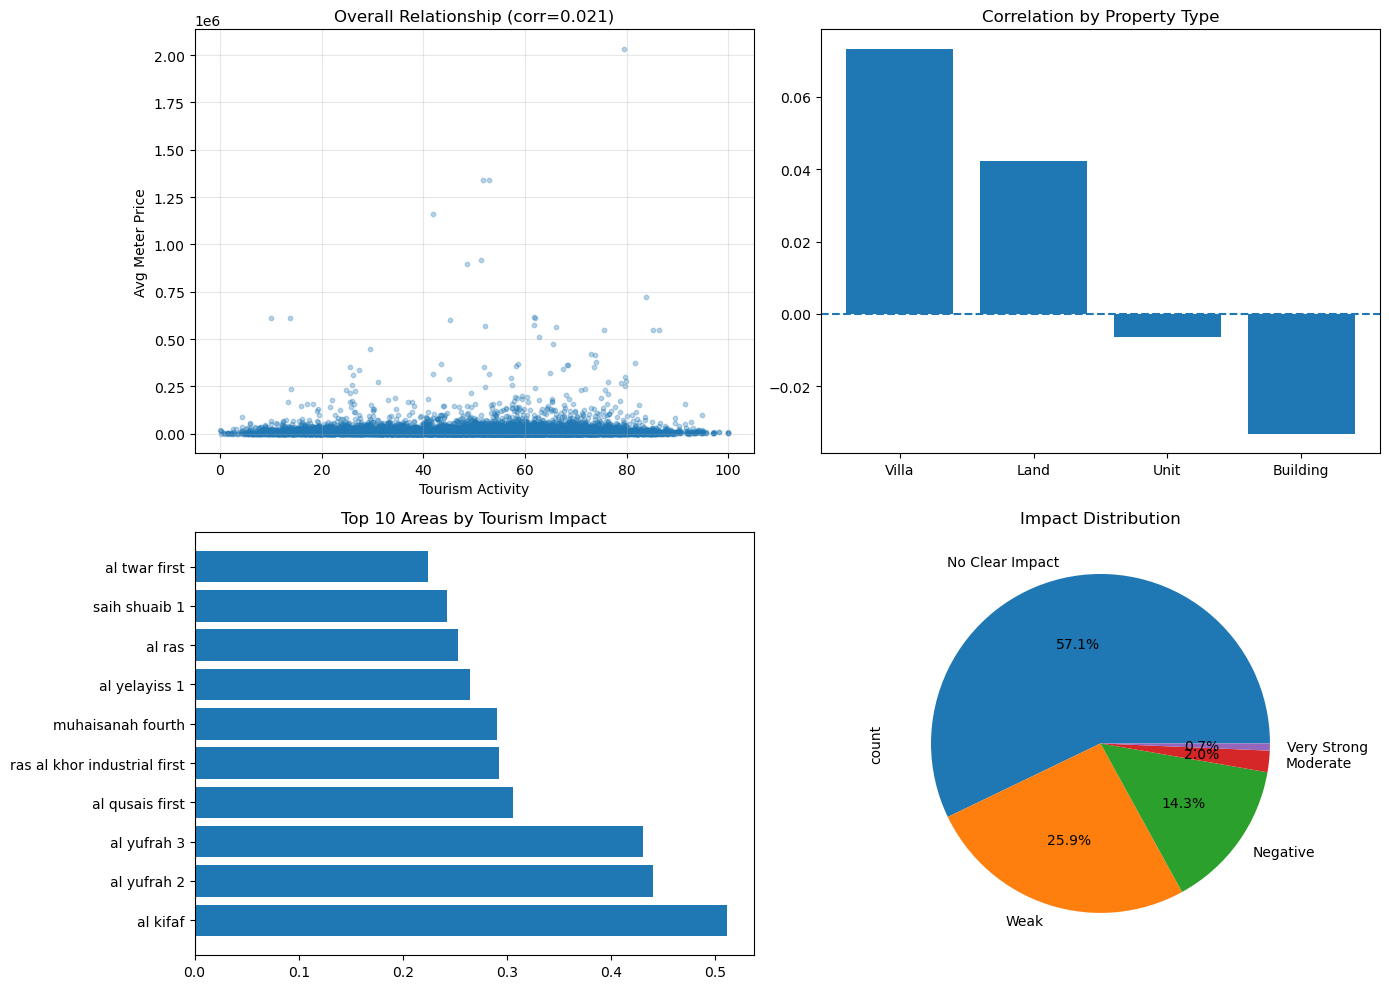

In [19]:

# 4 التصورات البيانية 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].scatter(df['tourism_activity'],
                  df['avg_meter_price'],
                  alpha=0.3, s=10)
axes[0,0].set_xlabel('Tourism Activity')
axes[0,0].set_ylabel('Avg Meter Price')
axes[0,0].set_title(f'Overall Relationship (corr={correlation:.3f})')
axes[0,0].grid(True, alpha=0.3)

if not property_df.empty:
    bars = axes[0,1].bar(property_df['Property Type'],
                         property_df['Correlation'])
    axes[0,1].set_title('Correlation by Property Type')
    axes[0,1].axhline(0, linestyle='--')

if not area_df.empty:
    axes[1,0].barh(top_10['Area'], top_10['Correlation'])
    axes[1,0].set_title('Top 10 Areas by Tourism Impact')
    axes[1,0].axvline(0)

if not area_df.empty:
    area_df['Impact Class'].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        ax=axes[1,1]
    )
    axes[1,1].set_title('Impact Distribution')

plt.tight_layout()